# Start
Import libraries & load data<br>

The target is to predict Survived so train and test data should merge as one.

In [487]:
from pprint import pprint

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [488]:
train_df = pd.read_csv('../input/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../input/test.csv', index_col='PassengerId')
df = train_df.append(test_df)

/app/.venv/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


# Recognize data

In [489]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [491]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [492]:
df.corr()

,Age,Fare,Parch,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.018322,0.373587,0.081629
Pclass,-0.408106,-0.558629,0.018322,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.338481,-0.035322,1.000000


# Should know which columns miss data
There are Age, Cabin, Embarked and Fare columns have null data.

In [493]:
null_series = df.isnull().any()
null_series = null_series[null_series == True]
null_series.index

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

# Analyze by groupby data

In [494]:
def extract_mean_survived_groupby_column(df, row_name, column_name):
    return df[[row_name, column_name]].groupby([row_name], as_index=True).mean() \
        .sort_values(by=column_name, ascending=False)

In [495]:
extract_mean_survived_groupby_column(df, 'Pclass', 'Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [496]:
extract_mean_survived_groupby_column(df, 'Sex', 'Survived')

,Survived
Sex,
female,0.742038
male,0.188908


In [497]:
extract_mean_survived_groupby_column(df, 'SibSp', 'Survived')

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [498]:
extract_mean_survived_groupby_column(df, 'Parch', 'Survived')

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


# Analyze by visualizing data

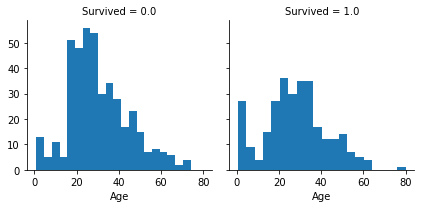

In [499]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

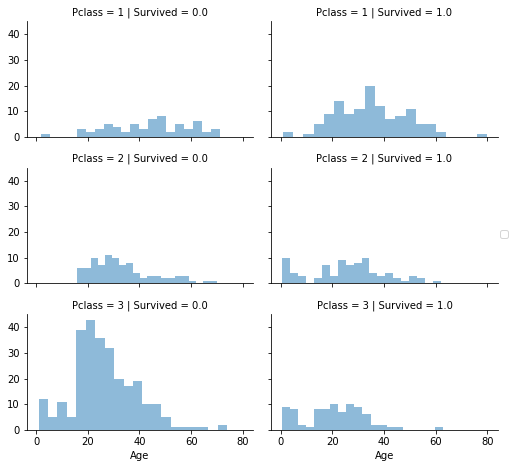

In [500]:
g = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

/app/.venv/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/app/.venv/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


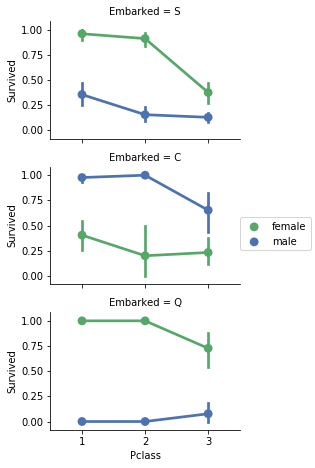

In [501]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/app/.venv/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


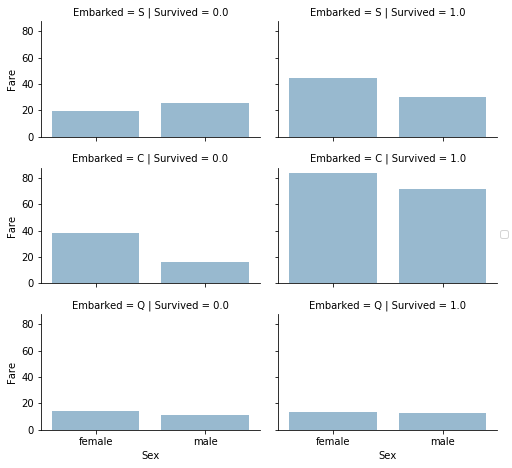

In [502]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/app/.venv/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


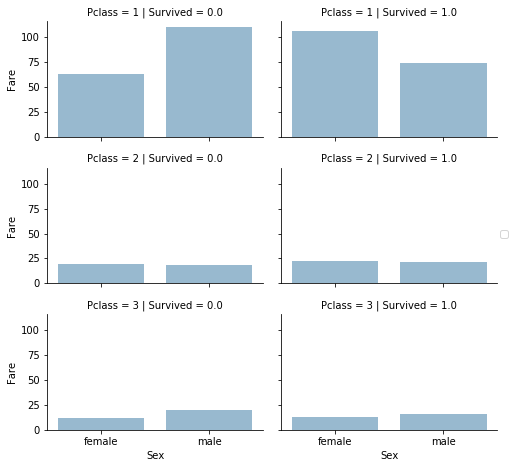

In [503]:
grid = sns.FacetGrid(df, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

/app/.venv/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


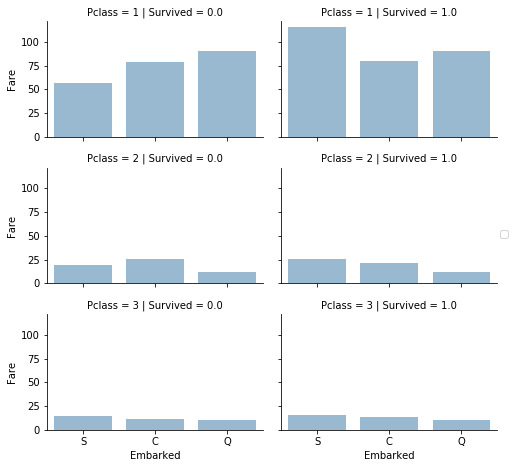

In [504]:
grid = sns.FacetGrid(df, row='Pclass', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Embarked', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Drop unimportant data

Cabin misses data too much. Ticket hasn't enough reference to relate with Survived.

In [505]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

# Creating new feature extracting from existing

In [506]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [507]:
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [508]:
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Capt          1
Jonkheer      1
Lady          1
Countess      1
Mme           1
Don           1
Sir           1
Dona          1
Name: Title, dtype: int64

In [509]:
title_series = df.Title.value_counts()
title_series = title_series >= 61
title_majority_list = title_series[title_series == True].index.tolist()
title_minority_list = title_series[title_series == False].index.tolist()

In [510]:
title_majority_df = df[df.Title.isin(title_majority_list)]
title_minority_df = df[df.Title.isin(title_minority_list)]

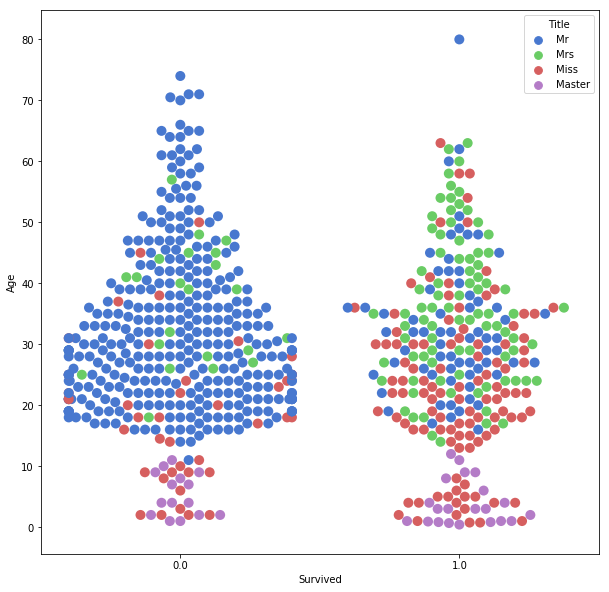

In [511]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.swarmplot(x='Survived', y="Age", hue='Title', data=title_majority_df, size=10, ax=ax, palette='muted')

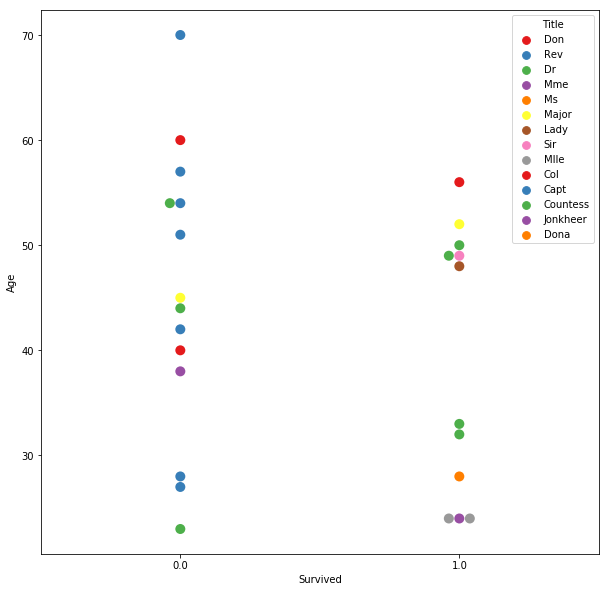

In [512]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.swarmplot(x='Survived', y='Age', hue='Title', data=title_minority_df, size=10, ax=ax, palette=sns.color_palette("Set1", n_colors=len(title_minority_list), desat=1))

In [513]:
title_dummy = pd.get_dummies(title_majority_df.Title)
tmp_df = df.drop(['Title'], axis=1)
tmp_df = pd.concat([tmp_df, title_dummy], axis=1)
tmp_df.corr()

,Age,Fare,Parch,Pclass,SibSp,Survived,Master,Miss,Mr,Mrs
Age,1.000000,0.178740,-0.150917,-0.408106,-0.243699,-0.077221,-0.394454,-0.275599,0.224942,0.236125
Fare,0.178740,1.000000,0.221539,-0.558629,0.160238,0.257307,0.013142,0.094844,-0.190286,0.145034
Parch,-0.150917,0.221539,1.000000,0.018322,0.373587,0.081629,0.252602,0.064678,-0.321332,0.215375
Pclass,-0.408106,-0.558629,0.018322,1.000000,0.060832,-0.338481,0.090847,0.016420,0.091071,-0.195702
SibSp,-0.243699,0.160238,0.373587,0.060832,1.000000,-0.035322,0.329850,0.077988,-0.254155,0.063639
Survived,-0.077221,0.257307,0.081629,-0.338481,-0.035322,1.000000,0.087546,0.335831,-0.565943,0.347106
Master,-0.394454,0.013142,0.252602,0.090847,0.329850,0.087546,1.000000,-0.113451,-0.270981,-0.095825
Miss,-0.275599,0.094844,0.064678,0.016420,0.077988,0.335831,-0.113451,1.000000,-0.611838,-0.216360
Mr,0.224942,-0.190286,-0.321332,0.091071,-0.254155,-0.565943,-0.270981,-0.611838,1.000000,-0.516781
Mrs,0.236125,0.145034,0.215375,-0.195702,0.063639,0.347106,-0.095825,-0.216360,-0.516781,1.000000


In [514]:
'''
Please refer here:
Mr. on wiki: https://en.wikipedia.org/wiki/Mr.
Miss on wiki: https://en.wikipedia.org/wiki/Miss
Ms on wiki: https://en.wikipedia.org/wiki/Ms.
'''
title_map = {
    'Capt': 'Mr',
    'Col': 'Mr',
    'Don': 'Mr',
    'Dona': 'Mrs',
    'Dr': 'Mr',
    'Jonkheer': 'Mr',
    'Lady': 'Mrs',
    'Major': 'Mr',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Rev': 'Mr',
    'Sir': 'Mr',
    'Countess': 'Mrs'}
df.Title = df.Title.replace(title_map)
df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [515]:
extract_mean_survived_groupby_column(df, 'Title', 'Survived')

,Survived
Title,
Mrs,0.796875
Miss,0.702703
Master,0.575000
Mr,0.161710


In [516]:
df = df.drop(columns=['Name'], axis=1)

In [517]:
title_dummies = pd.get_dummies(df.Title, prefix='title')
df = pd.concat([df, title_dummies], axis=1)
df = df.drop(columns=['Title'], axis=1)

# Completion

* Age
* Fare
* Embarked

## Completion Age

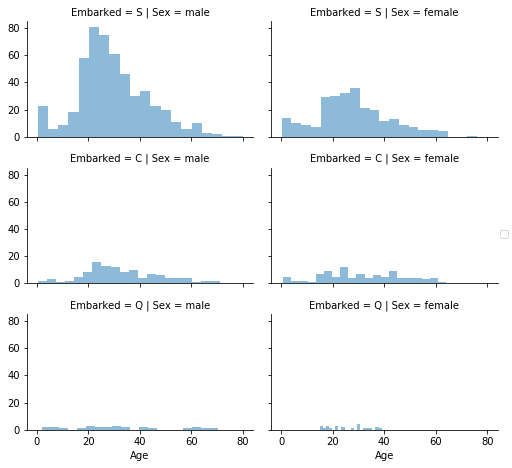

In [518]:
grid = sns.FacetGrid(df, row='Embarked', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

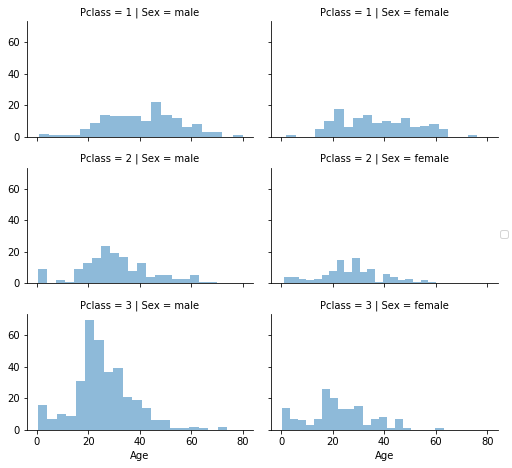

In [519]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [520]:
pclass_dummies = pd.get_dummies(df.Pclass)
embarked_dummies = pd.get_dummies(df.Embarked)
sex_dummies = pd.get_dummies(df.Sex)
tmp_df = pd.concat([df, pclass_dummies, embarked_dummies, sex_dummies], axis=1)
tmp_df.corr()

,Age,Fare,Parch,Pclass,SibSp,Survived,title_Master,title_Miss,title_Mr,title_Mrs,1,2,3,C,Q,S,female,male
Age,1.000000,0.178740,-0.150917,-0.408106,-0.243699,-0.077221,-0.391259,-0.282792,0.238673,0.219841,0.393198,-0.014986,-0.337069,0.085777,-0.019458,-0.075972,-0.063645,0.063645
Fare,0.178740,1.000000,0.221539,-0.558629,0.160238,0.257307,0.011596,0.090110,-0.186406,0.146375,0.600031,-0.121384,-0.419752,0.286269,-0.130059,-0.172683,0.185523,-0.185523
Parch,-0.150917,0.221539,1.000000,0.018322,0.373587,0.081629,0.253482,0.064589,-0.317819,0.212113,-0.013033,-0.010057,0.019521,-0.008635,-0.100943,0.073258,0.213125,-0.213125
Pclass,-0.408106,-0.558629,0.018322,1.000000,0.060832,-0.338481,0.095257,0.025350,0.078342,-0.190444,-0.884911,-0.182413,0.915201,-0.269658,0.230491,0.096335,-0.124617,0.124617
SibSp,-0.243699,0.160238,0.373587,0.060832,1.000000,-0.035322,0.329171,0.075519,-0.249315,0.062537,-0.034256,-0.052419,0.072610,-0.048396,-0.048678,0.075198,0.109609,-0.109609
Survived,-0.077221,0.257307,0.081629,-0.338481,-0.035322,1.000000,0.085221,0.335636,-0.563879,0.347864,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.155660,0.543351,-0.543351
title_Master,-0.391259,0.011596,0.253482,0.095257,0.329171,0.085221,1.000000,-0.111122,-0.269740,-0.094164,-0.084504,-0.016933,0.086998,-0.014172,-0.009091,0.019007,-0.164375,0.164375
title_Miss,-0.282792,0.090110,0.064589,0.025350,0.075519,0.335636,-0.111122,1.000000,-0.613242,-0.214078,-0.013879,-0.022679,0.030600,-0.016251,0.203538,-0.117530,0.676028,-0.676028
title_Mr,0.238673,-0.186406,-0.317819,0.078342,-0.249315,-0.563879,-0.269740,-0.613242,1.000000,-0.519656,-0.065809,-0.021715,0.074742,-0.059710,-0.083173,0.109565,-0.903871,0.903871
title_Mrs,0.219841,0.146375,0.212113,-0.190444,0.062537,0.347864,-0.094164,-0.214078,-0.519656,1.000000,0.154347,0.064672,-0.186564,0.107572,-0.108114,-0.029299,0.572861,-0.572861


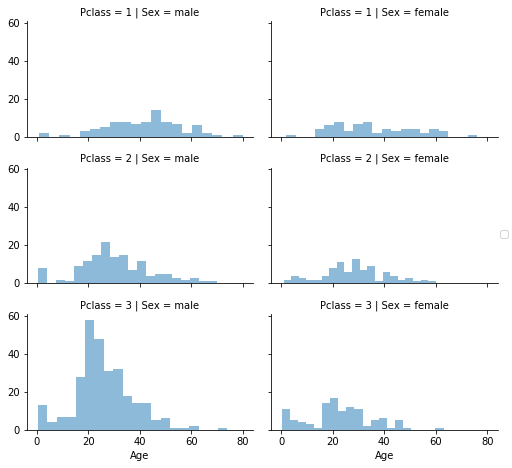

In [521]:
grid = sns.FacetGrid(df[df.Embarked == 'S'], row='Pclass', col='Sex', 
                     size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

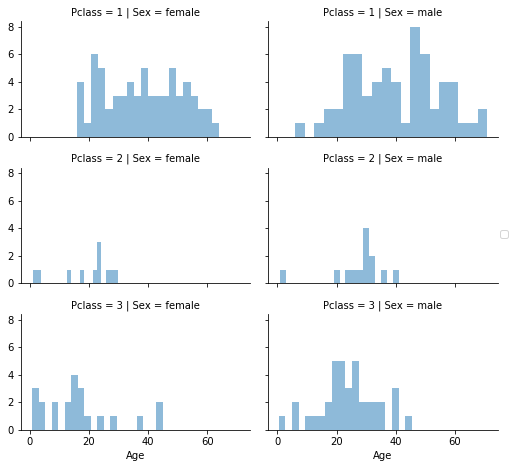

In [522]:
# data of Embarked C is too few
grid = sns.FacetGrid(df[df.Embarked == 'C'], row='Pclass', col='Sex', 
                     size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

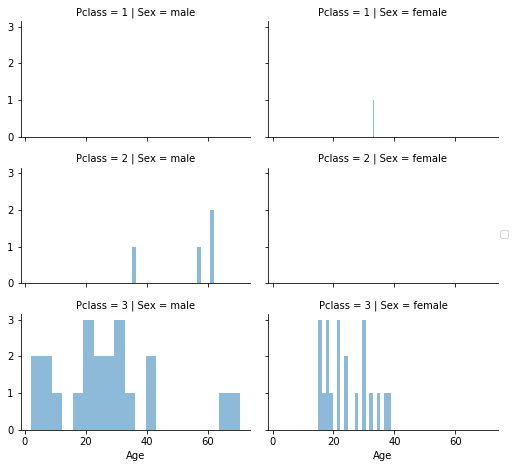

In [523]:
# data of Embarked Q is too few
grid = sns.FacetGrid(df[df.Embarked == 'Q'], row='Pclass', col='Sex', 
                     size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [524]:
for embark_index in df.Embarked.value_counts().index:
    the_embark_series = df.Embarked == embark_index
    for sex_index in df.Sex.value_counts().index:
        the_sex_series = df.Sex == sex_index
        median = df[the_embark_series & the_sex_series].Age.median()
        df.loc[the_embark_series & the_sex_series & df.Age.isnull(), 'Age'] = median
df.Age = df.Age.astype(int)

In [525]:
age_intervals = (
    (-1, 3),
    (3, 6),
    (6, 9),
    (9, 12),
    (12, 15),
    (15, 18),
    (18, 21),
    (21, 25),
    (25, 30),
    (30, 35),
    (35, 40),
    (40, 45),
    (45, 50),
    (50, 55),
    (55, 60),
    (60, 65),
    (65, 80)
)
def apply_age_intervals(age):
    for index, age_interval in enumerate(age_intervals):
        left, right = age_interval
        if left < age <= right:
            return index
df['age_stage'] = df.Age.apply(apply_age_intervals).astype(int)

In [526]:
df[['age_stage', 'Survived']].groupby(['age_stage'], as_index=False).mean() \
    .sort_values(by='age_stage', ascending=True)

,age_stage,Survived
0,0,0.666667
1,1,0.764706
2,2,0.333333
3,3,0.285714
4,4,0.642857
5,5,0.375000
6,6,0.261538
7,7,0.471074
8,8,0.281369
9,9,0.476744


In [527]:
age_stage_dummies = pd.get_dummies(df.age_stage, prefix='age_stage')
df = pd.concat([df, age_stage_dummies], axis=1)
df = df.drop(columns=['Age', 'age_stage'], axis=1)

## Completion Fare

In [528]:
for embark_index in df.Embarked.value_counts().index:
    the_embark_series = df.Embarked == embark_index
    for pclass_index in df.Pclass.value_counts().index:
        the_pclass_series = df.Pclass == pclass_index
        median = df[the_embark_series & the_pclass_series].Fare.median()
        df.loc[the_embark_series & the_pclass_series & df.Fare.isnull(), 'Fare'] = median

## Completion Embarked

In [529]:
most_embarked = df.Embarked.value_counts().index[0]
df.Embarked.fillna(most_embarked, inplace=True)

In [530]:
embarked_dummies = pd.get_dummies(df.Embarked, prefix='embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(columns=['Embarked'], axis=1)

## Create feature

In [531]:
is_alone_series = (df.Parch == 0) & (df.SibSp == 0)
df['is_alone'] = is_alone_series.astype(int)

In [532]:
sex_dummies = pd.get_dummies(df.Sex, prefix='sex')
df = pd.concat([df, sex_dummies], axis=1)
df = df.drop(columns=['Sex'], axis=1)

# Model, predict and solve

In [555]:
from sklearn.model_selection import cross_val_score

In [546]:
train_df = df[df.Survived.notnull()]
test_df = df[df.Survived.isnull()]
train_df.Survived = train_df.Survived.astype(int)
test_df = test_df.drop(columns=['Survived'], axis=1)

/app/.venv/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


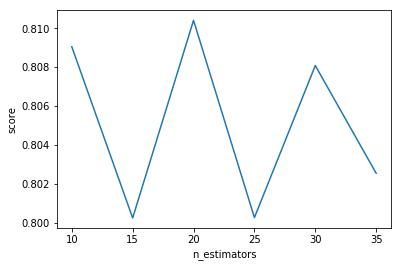

{10: 0.8090502854633289,
 15: 0.8002591128678086,
 20: 0.8104084321475626,
 25: 0.8002821695213,
 30: 0.8080873956960914,
 35: 0.8025559947299078}


In [564]:
scores = []
the_range = list(range(10, 40, 5))
for n_estimators in the_range:
    clf = RandomForestClassifier(n_estimators=n_estimators)
    #score = clf.score(train_df.drop(columns=['Survived'], axis=1), train_df.Survived)
    cv_scores = cross_val_score(clf,
                                train_df.drop(columns=['Survived'], axis=1), 
                                train_df.Survived,
                                cv=20)
    scores.append(cv_scores.mean())
    
plt.plot(the_range, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

pprint(dict(zip(the_range, scores)))

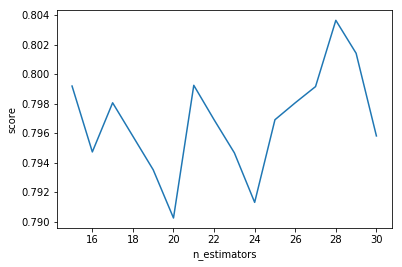

{15: 0.7991970264442174,
 16: 0.7947276132107592,
 17: 0.7980612302803314,
 18: 0.7957885030076041,
 19: 0.7935157757348767,
 20: 0.7902454318465555,
 21: 0.7992469640222449,
 22: 0.7969118147769834,
 23: 0.7946651912382249,
 24: 0.7913066053796391,
 25: 0.7969118147769834,
 26: 0.7980612302803315,
 27: 0.7991592895244581,
 28: 0.80365367154693,
 29: 0.8014192486664398,
 30: 0.795813188060379}


In [562]:
scores = []
the_range = list(range(15, 31))
for n_estimators in the_range:
    clf = RandomForestClassifier(n_estimators=n_estimators)
    #score = clf.score(train_df.drop(columns=['Survived'], axis=1), train_df.Survived)
    cv_scores = cross_val_score(clf,
                                train_df.drop(columns=['Survived'], axis=1), 
                                train_df.Survived,
                                cv=10)
    scores.append(cv_scores.mean())
    
plt.plot(the_range, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

pprint(dict(zip(the_range, scores)))

In [548]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 31 columns):
Fare            418 non-null float64
Parch           418 non-null int64
Pclass          418 non-null int64
SibSp           418 non-null int64
title_Master    418 non-null uint8
title_Miss      418 non-null uint8
title_Mr        418 non-null uint8
title_Mrs       418 non-null uint8
age_stage_0     418 non-null uint8
age_stage_1     418 non-null uint8
age_stage_2     418 non-null uint8
age_stage_3     418 non-null uint8
age_stage_4     418 non-null uint8
age_stage_5     418 non-null uint8
age_stage_6     418 non-null uint8
age_stage_7     418 non-null uint8
age_stage_8     418 non-null uint8
age_stage_9     418 non-null uint8
age_stage_10    418 non-null uint8
age_stage_11    418 non-null uint8
age_stage_12    418 non-null uint8
age_stage_13    418 non-null uint8
age_stage_14    418 non-null uint8
age_stage_15    418 non-null uint8
age_stage_16    418 non-null uint8
embarked_C     

In [565]:
clf = RandomForestClassifier()
clf = clf.fit(train_df.drop(columns=['Survived'], axis=1), 
              train_df.Survived)

In [566]:
predict_result = clf.predict(test_df)

In [577]:
test_df = pd.read_csv('../input/test.csv')
test_df['Survived'] = predict_result.astype(int)

In [586]:
test_df[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)